In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 
import sklearn as sk

In [45]:
df = pd.read_csv('funda-amsterdam.csv')
df.head(3)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003


### Quantitative Variables
The variables I'm going to work with are price, area and rooms.
After making the first plot some houses were sold for 0 euros. Let's remove those.

In [3]:
sdf = df[['area', 'rooms', 'price']]
sdf.head(5)

,area,rooms,price
0,108,3,510000
1,47,2,215000
2,116,3,325000
3,58,3,315000
4,63,3,200000


In [4]:
sdf = sdf.loc[(sdf['price'] > 10000) & (sdf['rooms'] > 0) & (sdf['area'] > 10)]

Had to use .loc since the normal notation didn't work. Added the rest of the categories (rooms & area) to see if & would work

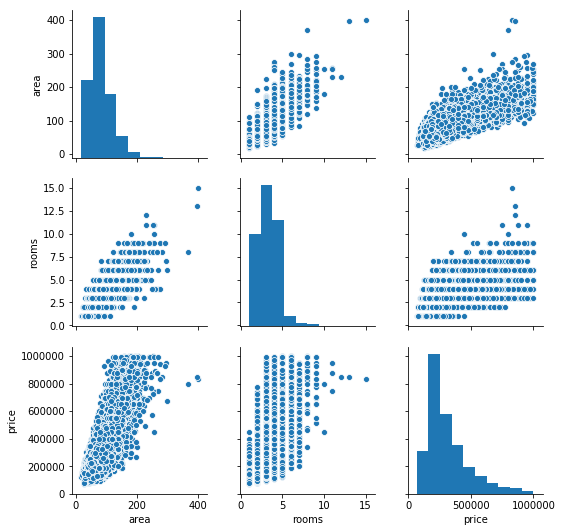

In [5]:
sns.pairplot(sdf)

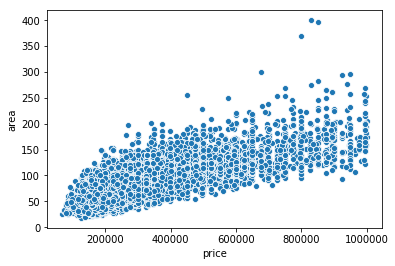

In [6]:
sns.scatterplot(x="price", y="area", data=sdf)

The relationship between the price and area is linear.

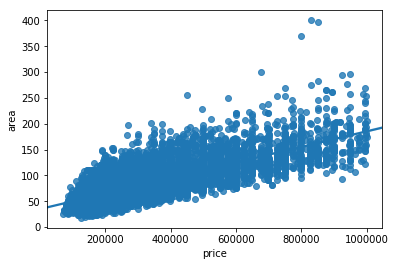

In [7]:
sns.regplot(x="price", y="area", data=sdf)

In [8]:
pearsonr(sdf['price'], sdf['area'])

(0.7250807666953685, 0.0)

The price and area are highly correlated since the r > 0.6 - 
The correlation is significant.

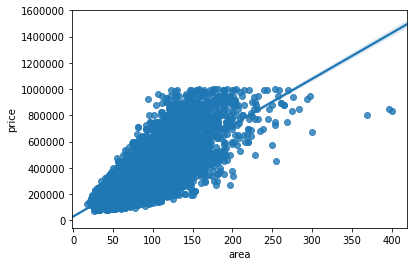

In [9]:
sns.regplot(x="area", y="price", data=sdf)

### SK-learn, linear regression
I'm not sure what model to pick, both seem to work as graphs.
However, the second one looks better, so we'll go with area as X

The formula is  
$ b0 + b1 X + e $

Our X is area
Our Y is price

We will calculate the b0 and b1 with sk-learn

In [22]:
from sklearn.linear_model import LinearRegression

x = sdf[['area']] 
y = sdf['price']
lm = LinearRegression()
lm.fit(x, y)

b0 = lm.coef_[0]
b1 = lm.intercept_

Our b0 is 3498.8143600771396 ; 
Our b1 is 27983.929867592116

### Predictions
Putting X = 70, we can fill in our predict function:

In [29]:
lm.predict(70)

array([272900.93507299])

In [23]:
sdf['price_prediction'] = lm.predict(x)
sdf.head(10)

,area,rooms,price,price_prediction
0,108,3,510000,405855.880756
1,47,2,215000,192428.204791
2,116,3,325000,433846.395637
3,58,3,315000,230915.162752
4,63,3,200000,248409.234552
5,125,3,515000,465335.724877
6,64,4,200000,251908.048913
7,155,5,599000,570300.155680
8,85,3,249000,325383.150474
9,67,3,300000,262404.491993


In [44]:
add = 'Slichtenhorststraat 10'
aa = df[df['address'] == add]
aa

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
21,21,Slichtenhorststraat 10,114,3,1107 VH,18-9-2015,234500,house,4,3-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1983


We now know that the area of SLichtenhorststraat is 114. putting this number in our predict function...

In [32]:
lm.predict(114)

array([426848.76691639])

Gives us a price point of 426848

## the E

But the property was sold for €234500 instead of the predicted €426848
This means our E = -192348